In [6]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Define the directory where your JSON files are stored
json_directory = '../models/'

# List of all model names and corresponding JSON filenames
model_files = {
    'Logistic Regression': 'logistic_regression_metrics.json',
    'Decision Tree': 'decision_tree_metrics.json',
    'Random Forest': 'random_forest_ipca_metrics.json',
    'SVM': 'svm_metrics.json',
    'KNN': 'knn_metrics.json'
}

# Initialize an empty dictionary to store metrics
model_metrics = {}

# Load each JSON file and add its contents to the dictionary
for model_name, filename in model_files.items():
    filepath = os.path.join(json_directory, filename)
    with open(filepath, 'r') as file:
        model_metrics[model_name] = json.load(file)

# Now model_metrics contains all the metrics for comparison


In [8]:
# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Transpose the DataFrame for better readability
metrics_df = metrics_df.transpose()

# Display the DataFrame
metrics_df


,accuracy,precision,recall,f1_score,cross_val_mean_accuracy,cross_val_std_accuracy,classification_report
Logistic Regression,0.954713,0.953301,0.958834,0.956059,0.954799,0.002718,NaN
Decision Tree,0.913448,NaN,NaN,NaN,NaN,NaN,"{'0': {'precision': 0.9204611792177466, 'recal..."
Random Forest,0.923989,NaN,NaN,NaN,NaN,NaN,"{'0': {'precision': 0.929671607090962, 'recall..."
SVM,0.941,NaN,NaN,NaN,NaN,NaN,"{'0': {'precision': 0.9376299376299376, 'recal..."
KNN,0.895277,NaN,NaN,NaN,NaN,NaN,"{'0': {'precision': 0.8928571428571429, 'recal..."


In [9]:
# Initialise empty lists to store the metrics
precision_0, recall_0, f1_0 = [], [], []
precision_1, recall_1, f1_1 = [], [], []

# Iterate over each model's classification report
for model in metrics_df.index:
    if pd.notna(metrics_df.at[model, 'classification_report']):
        # For class 0 (fake news)
        precision_0.append(metrics_df.at[model, 'classification_report']['0']['precision'])
        recall_0.append(metrics_df.at[model, 'classification_report']['0']['recall'])
        f1_0.append(metrics_df.at[model, 'classification_report']['0']['f1-score'])

        # For class 1 (real news)
        precision_1.append(metrics_df.at[model, 'classification_report']['1']['precision'])
        recall_1.append(metrics_df.at[model, 'classification_report']['1']['recall'])
        f1_1.append(metrics_df.at[model, 'classification_report']['1']['f1-score'])
    else:
        precision_0.append(None)
        recall_0.append(None)
        f1_0.append(None)
        precision_1.append(None)
        recall_1.append(None)
        f1_1.append(None)

# Add these metrics as new columns to the DataFrame
metrics_df['precision_0'] = precision_0
metrics_df['recall_0'] = recall_0
metrics_df['f1_0'] = f1_0
metrics_df['precision_1'] = precision_1
metrics_df['recall_1'] = recall_1
metrics_df['f1_1'] = f1_1

# Drop the classification_report column if you no longer need it
metrics_df.drop(columns=['classification_report'], inplace=True)


In [10]:
metrics_df

,accuracy,precision,recall,f1_score,cross_val_mean_accuracy,cross_val_std_accuracy,precision_0,recall_0,f1_0,precision_1,recall_1,f1_1
Logistic Regression,0.954713,0.953301,0.958834,0.956059,0.954799,0.002718,NaN,NaN,NaN,NaN,NaN,NaN
Decision Tree,0.913448,NaN,NaN,NaN,NaN,NaN,0.920461,0.899715,0.909970,0.907097,0.926441,0.916667
Random Forest,0.923989,NaN,NaN,NaN,NaN,NaN,0.929672,0.912696,0.921106,0.918801,0.934674,0.926669
SVM,0.941,NaN,NaN,NaN,NaN,NaN,0.937630,0.939583,0.938606,0.944123,0.942308,0.943215
KNN,0.895277,NaN,NaN,NaN,NaN,NaN,0.892857,0.891583,0.892220,0.897560,0.898772,0.898166


In [5]:
# Save the metrics DataFrame to a CSV file
metrics_df.to_csv('../models/model_comparison_metrics.csv', index=True)

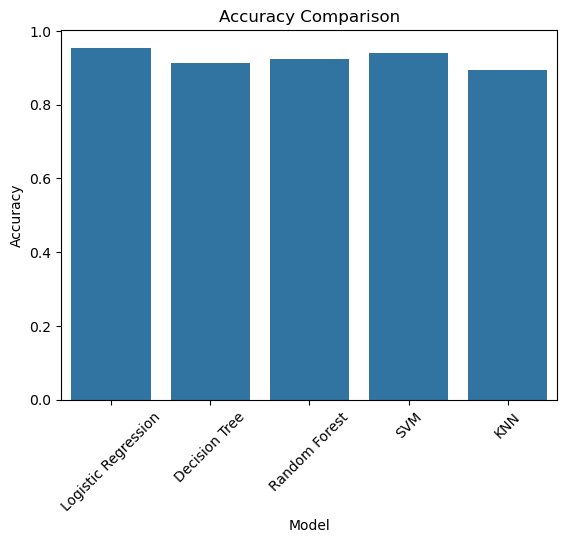

In [7]:
# Plot accuracy comparison
sns.barplot(x=metrics_df.index, y=metrics_df['accuracy'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()
